In [1]:
# Following is the Code for comparators of two numbers (2 Qubits) provided example of Num1:(a1:1)(a2:1)=10=2 and Num2:(b1:0)(b2:1)=11=3
# problem statement it's comparing first two bits of each number but as soon as we move towards second set a2,b2 it shows zero 
# the issue is in both 2 bit comparator and 3 bit comparator

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.tools.monitor import job_monitor 
import math
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [3]:
qr1 = QuantumRegister(4)
mea = ClassicalRegister(2)
circuit = QuantumCircuit(qr1,mea)

In [4]:
initial=[[1,0],[0,1]]
circuit.initialize(initial[0], 0)
circuit.initialize(initial[1], 1)

#  Uc 
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[2])
circuit.x(qr1[0])
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[3])
circuit.x(qr1[0])

# Measuring Significant output
circuit.measure(qr1[2],mea[0])
circuit.measure(qr1[3],mea[1])

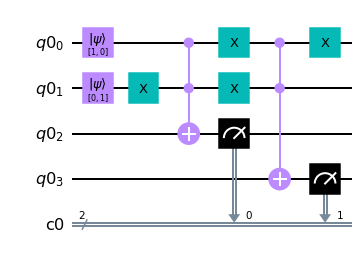

In [5]:
simulator = Aer.get_backend('statevector_simulator')
circuit.draw(output = 'mpl')

{2: 1}


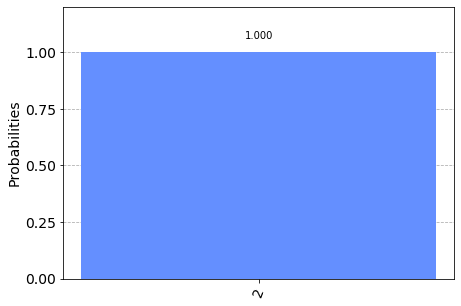

In [6]:
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()

counts = counts.int_outcomes()
print(counts)
state = result.get_statevector()
plot_histogram(counts)

In [7]:
# IBMQ.save_account('2a18c21d0290fdae39f5415414efdb49a4dfe503d8101a3ee4afd6e6da6ead34bf084b82f1f73c097f2be712dcbf4aadc1e0c07bae0117abf0ff16442c293b25')
# IBMQ.load_account()

# provider = IBMQ.get_provider('ibm-q')
# qcomp = provider.get_backend('ibmq_16_melbourne') 

In [8]:
# job = execute(circuit, backend=qcomp)
# job_monitor(job)

In [9]:
#plot_histogram(job.result().get_counts())